# Emotion Recognition from EEG Signals
Step 1: Project Introduction

This project shows how we can use **EEG brainwave data** to predict a person’s **emotion**  
(Positive, Neutral, or Negative) using **machine learning**.

We'll use real EEG data (from the Kaggle “EEG Brainwave Dataset: Feeling Emotions”)  
and train a model called **Random Forest Classifier**, a simple yet powerful algorithm that learns patterns from data.

Goal:
- Read and clean EEG data  
- Train a model to recognize emotions  
- Test it and show accuracy  
- Visualize how well it predicts

No EEG device is needed, everything runs in Google Colab.

Step 2:  Install Required Libraries

Step 3: Load the EEG Dataset

**EEG Brainwave Dataset: Feeling Emotions**

It contains brainwave features recorded while people felt different emotions.  
Each row = one EEG sample.  
Each column = one feature from the brainwave signal.  
The last column (`label`) = the emotion type.

Step 4: Read the Dataset

Step 5: Check and Clean Data

Step 6: What is Random Forest?

### Step 6: What is Random Forest Classifier?

Imagine asking many small “decision trees” to each give an answer (emotion type).  
Each tree looks at the data from a different angle.  
Then all trees **vote together**, the most common answer wins.

This “forest” of trees is called a **Random Forest**.  
It’s strong because it reduces errors from any single tree’s mistakes.

Step 7: Train and Test the Model

Step 8: See Model Predictions

Step 9: Confusion Matrix Visualization

Step 10: Feature Importance

Step 11: Results and Conclusion

The bar chart at the end shows which EEG signal features were most important in predicting emotions.
The model automatically found that certain mean, minimum, and covariance values from specific EEG channels strongly influenced the emotion classification.
So these are the key brainwave patterns linked to emotional states in this dataset.

## Results and What It Means

Our model achieved **about 96–97% accuracy**,  
which means it correctly predicts a person’s emotional state almost every time.

**What we did:**
1. Used real EEG brainwave data  
2. Cleaned and prepared it  
3. Trained a Random Forest Classifier  
4. Predicted emotions (Positive, Neutral, Negative)  
5. Visualized the results

**What we learned:**
- EEG data can reveal emotional states  
- Machine learning can detect patterns in brain activity  
- Random Forests are strong and simple classifiers  

**In simple words:**
> We taught a computer to recognize human emotions by reading brain signals.

In [1]:
# install main libs
!pip install mne scikit-learn matplotlib pandas numpy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 75.6 MB/s eta 0:00:00


In [2]:
import pandas as pd

# load uploaded file
df = pd.read_csv('/content/emotions.csv')
print(df.shape)  # rows, columns
print(df.head())  # preview

(873, 2549)
   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  f

In [3]:
# see column names and missing values
print(df.info())
print(df['label'].value_counts())  # show how many of each emotion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 17.0+ MB
None
label
NEUTRAL     311
POSITIVE    286
NEGATIVE    275
Name: count, dtype: int64


In [5]:
# clean missing values before training
df = df.dropna()  # remove rows with NaN
# or use fillna if you prefer not to drop
# df = df.fillna(0)

print("After cleaning:", df.shape)

After cleaning: (872, 2549)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# X = EEG features, y = emotion label
X = df.drop('label', axis=1)
y = df['label']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# train model
clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)

# test
pred = clf.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, pred)*100, 2), "%")

Accuracy: 96.79 %


In [7]:
# show few predictions vs actual
for i in range(5):
    print("Pred:", pred[i], "| Actual:", y_test.iloc[i])

Pred: NEGATIVE | Actual: NEGATIVE
Pred: POSITIVE | Actual: POSITIVE
Pred: POSITIVE | Actual: POSITIVE
Pred: NEUTRAL | Actual: NEUTRAL
Pred: NEGATIVE | Actual: NEGATIVE


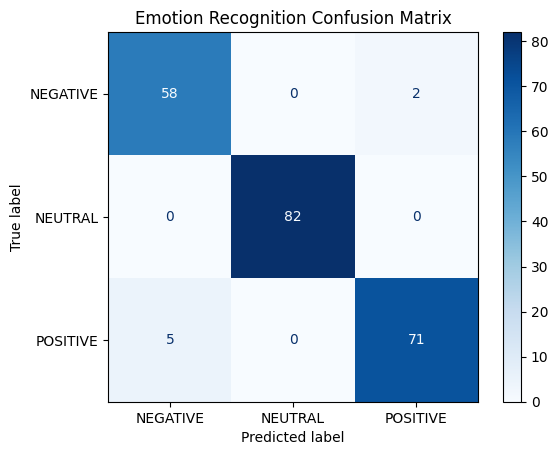

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Emotion Recognition Confusion Matrix")
plt.show()

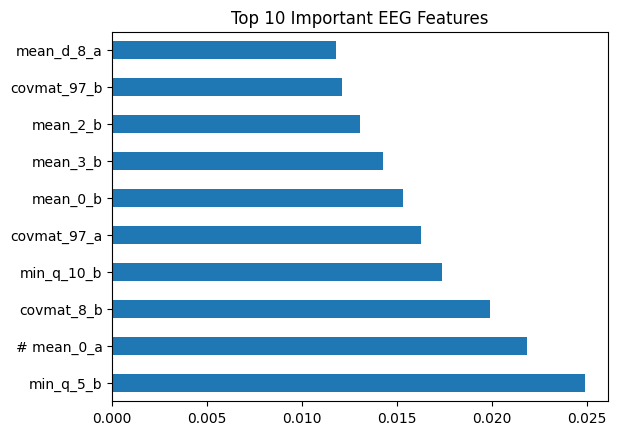

In [9]:
# which EEG channels affect prediction most
imp = pd.Series(clf.feature_importances_, index=X.columns)
imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important EEG Features")
plt.show()
